In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

Minimum k value is  34


Text(0.5, 1.0, 'Trajectory')

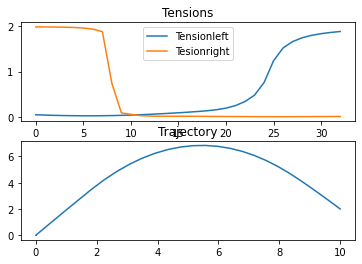

In [19]:
pinit = np.array([0,0])
pdes = np.array([10,2])

upBound = 100
lowBound = 10
									 

theta = 15*np.pi/180
			 

mass = 0.1
					
Tmax = 2
g = np.array([0,-9.8]).reshape((2,1))
h = 0.1

orientation_Matrix = np.array([[- np.sin(theta), np.sin(theta) ], [ np.cos(theta), np.cos(theta) ]])
Feasible_p = 0
Feasible_T = 0
while not lowBound + 1 == upBound:
  i = int((upBound + lowBound)/2.0)
  #print(k)
  Tes = cp.Variable((2,i-1))
  pos = cp.Variable((2,i))
  vel = cp.Variable((2,i))

  F = orientation_Matrix@Tes + mass*np.tile(g,(1,i-1))

  constraints = [0 <= Tes, Tes <= Tmax]
  constraints += [pos[:,1:i] == pos[:,0:i-1] + h*vel[:,0:i-1]]
  constraints += [vel[:,1:i] == vel[:,0:i-1] + (h/mass)*F]
  constraints += [pos[:,0] == pinit, pos[:,i-1] == pdes]
  constraints += [vel[:,0] == 0 , vel[:,i-1] == 0]



  prob = cp.Problem(cp.Minimize(0),constraints)
  optimal_value = prob.solve()
  if optimal_value == 0:
    upBound = i
    Feasible_T = Tes.value
    Feasible_p = pos.value
  else :
    lowBound = i
i = upBound
print('Minimum k value is ', i)
plt.subplot(2,1,1)
plt.plot(Feasible_T[0,:].T,label='Tensionleft')
plt.plot(Feasible_T[1,:].T,label='Tesionright')
plt.legend()
plt.title('Tensions')
plt.subplot(2,1,2)
plt.plot(Feasible_p[0,:].T,Feasible_p[1,:].T)
plt.title('Trajectory')
